In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\acer\\anaconda3\\ResizedDatasets\\training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2700 files belonging to 6 classes.


In [4]:
class_names = dataset.class_names
class_names

['Acne', 'Eczema', 'Melonoma', 'Psoiasis', 'Ringworm', 'Warts']

In [5]:
for image_batch, labels_batch in dataset.take(6):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 0 5 1 4 1 4 5 5 5 1 4 2 3 0 2 2 3 5 3 3 0 1 5 4 5 0 5 1 0 2 3]
(32, 256, 256, 3)
[3 1 5 4 4 4 0 1 0 2 3 3 0 5 0 3 5 2 1 3 4 3 4 4 3 4 5 5 1 1 5 3]
(32, 256, 256, 3)
[0 0 1 5 4 2 5 2 3 4 2 0 2 3 0 4 5 3 0 4 5 3 2 2 4 3 0 4 4 4 0 5]
(32, 256, 256, 3)
[1 4 2 2 4 3 1 0 3 0 2 5 4 2 2 3 1 3 3 0 4 4 5 5 3 3 4 4 4 1 5 4]
(32, 256, 256, 3)
[3 3 0 4 5 3 4 1 2 2 2 5 2 2 3 5 5 3 4 5 3 5 2 1 2 5 3 2 3 1 4 1]
(32, 256, 256, 3)
[1 4 1 3 5 4 2 2 2 5 1 3 4 0 1 2 3 2 4 2 5 3 0 2 3 5 0 5 5 4 1 2]


<ipython-input-6-4010da029d20>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 4, i + 1)


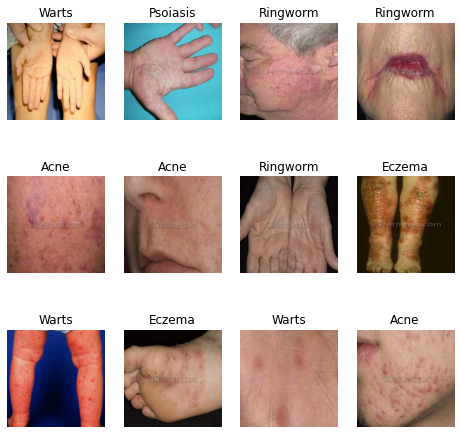

In [6]:
plt.figure(figsize=(8, 8))
for image_batch, labels_batch in dataset.take(6):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

85

In [8]:
train_size = 0.8
len(dataset)*train_size

68.0

In [9]:
train_ds = dataset.take(76)
len(train_ds)

76

In [10]:
test_ds = dataset.skip(76)
len(test_ds)

9

In [11]:
val_size=0.1
len(dataset)*val_size


8.5

In [12]:
val_ds = test_ds.take(41)
len(val_ds)

9

In [13]:
test_ds = test_ds.skip(41)
len(test_ds)

0

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

68

In [19]:
len(val_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [22]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
68/68 [==============================] - 133s 2s/step - loss: 1.7944 - accuracy: 0.1647 - val_loss: 1.7905 - val_accuracy: 0.2188
Epoch 2/50
68/68 [==============================] - 126s 2s/step - loss: 1.7752 - accuracy: 0.1758 - val_loss: 1.7610 - val_accuracy: 0.2539
Epoch 3/50
68/68 [==============================] - 126s 2s/step - loss: 1.7385 - accuracy: 0.2514 - val_loss: 1.6962 - val_accuracy: 0.2930
Epoch 4/50
68/68 [==============================] - 125s 2s/step - loss: 1.7037 - accuracy: 0.2783 - val_loss: 1.6344 - val_accuracy: 0.3398
Epoch 5/50
68/68 [==============================] - 125s 2s/step - loss: 1.6413 - accuracy: 0.3177 - val_loss: 1.5876 - val_accuracy: 0.3359
Epoch 6/50
68/68 [==============================] - 125s 2s/step - loss: 1.6113 - accuracy: 0.3182 - val_loss: 1.5207 - val_accuracy: 0.3828
Epoch 7/50
68/68 [==============================] - 125s 2s/step - loss: 1.5629 - accuracy: 0.3479 - val_loss: 1.4714 - val_accuracy: 0.3633
Epoch 8/50
68

In [26]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 5s 343ms/step - loss: 0.6982 - accuracy: 0.7812


In [27]:
scores

[0.6981925368309021, 0.78125]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 68}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
type(history.history['loss'])


list

In [32]:
history.history['loss'][:5]

[1.7944140434265137,
 1.7752350568771362,
 1.7385011911392212,
 1.7037014961242676,
 1.641282081604004]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

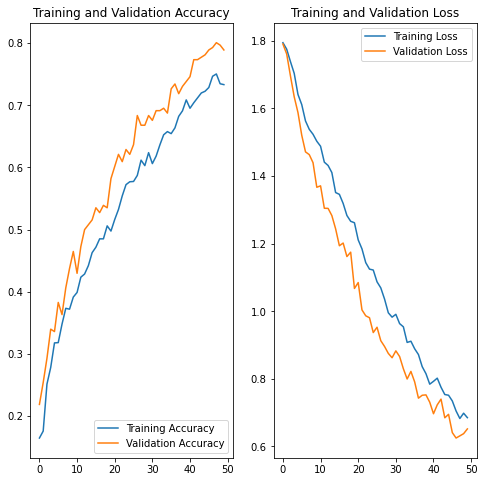

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Psoiasis
1/1 [==============================] - 1s 533ms/step
predicted label: Melonoma


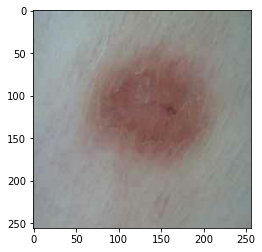

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 31ms/step


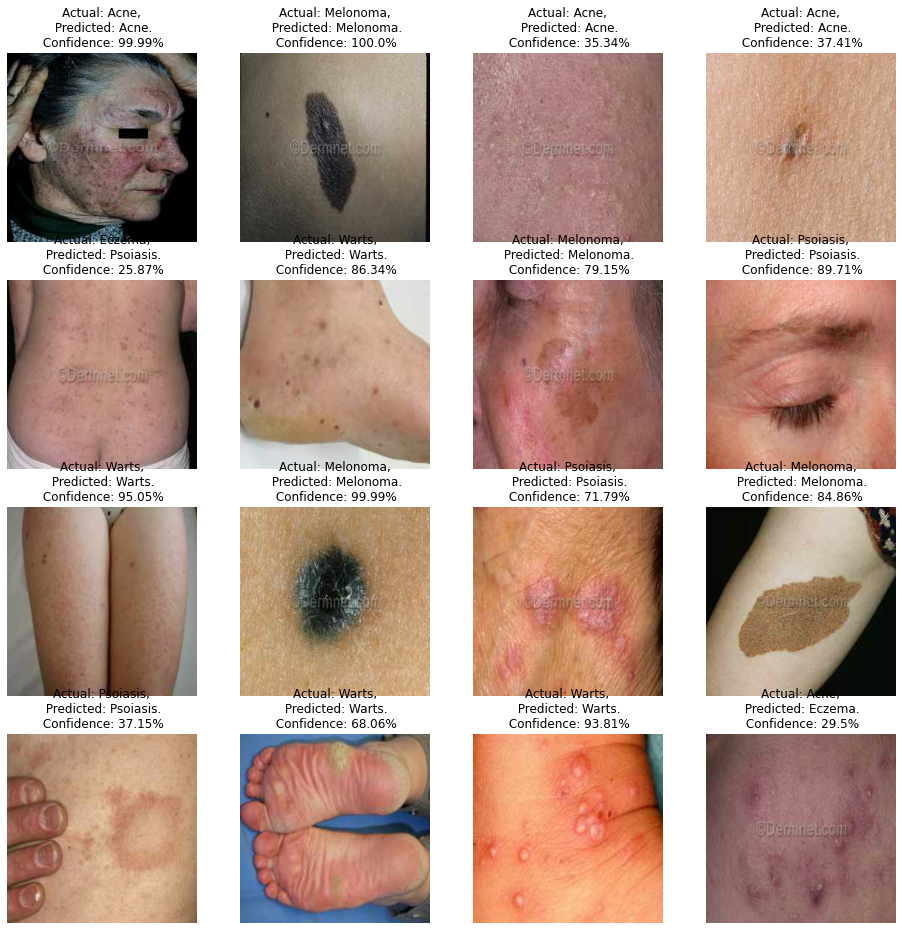

In [37]:
plt.figure(figsize=(16, 16))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
model.save("C:\\Users\\acer\\anaconda3\\models\\skindisease2.h5")